<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-18 17:20:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  51.6MB/s    in 4.0s    

2025-04-18 17:20:17 (50.9 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


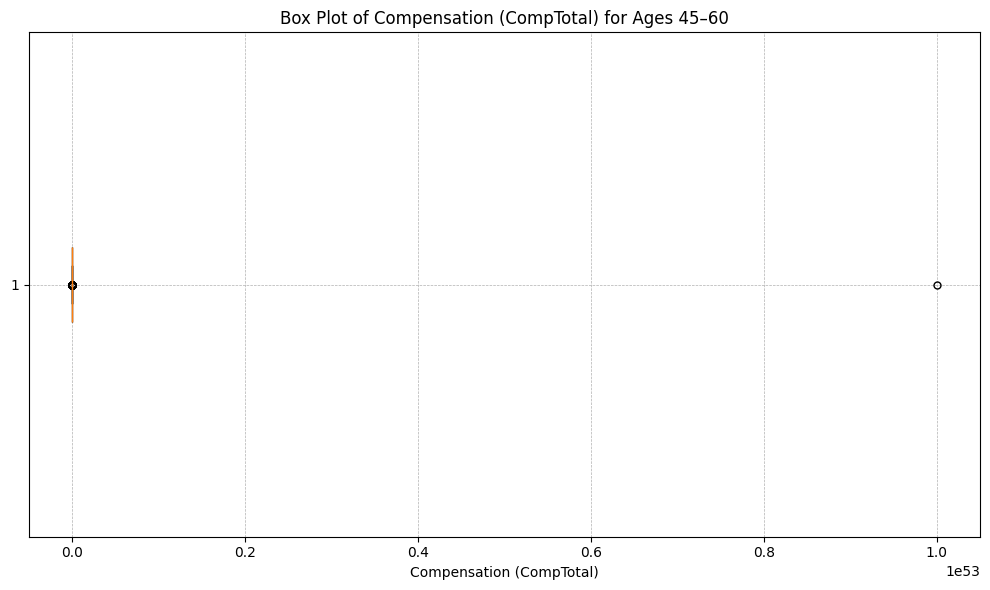

In [9]:
# Query to fetch Age and CompTotal columns where they are not null
query = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Clean and transform data
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Map age groups to representative values
age_mapping = {
    '45-54 years old': 49,
    '55-64 years old': 59
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Filter to age 45–60
df_filtered = df[df['AgeNumeric'].isin([49, 59])]


# Plot box plot for total compensation
plt.figure(figsize=(10, 6))

# Create the box plot for CompTotal
plt.boxplot(df_filtered['CompTotal'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            flierprops=dict(marker='o', color='red', markersize=5))

# Styling
plt.title("Box Plot of Compensation (CompTotal) for Ages 45–60")
plt.xlabel("Compensation (CompTotal)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


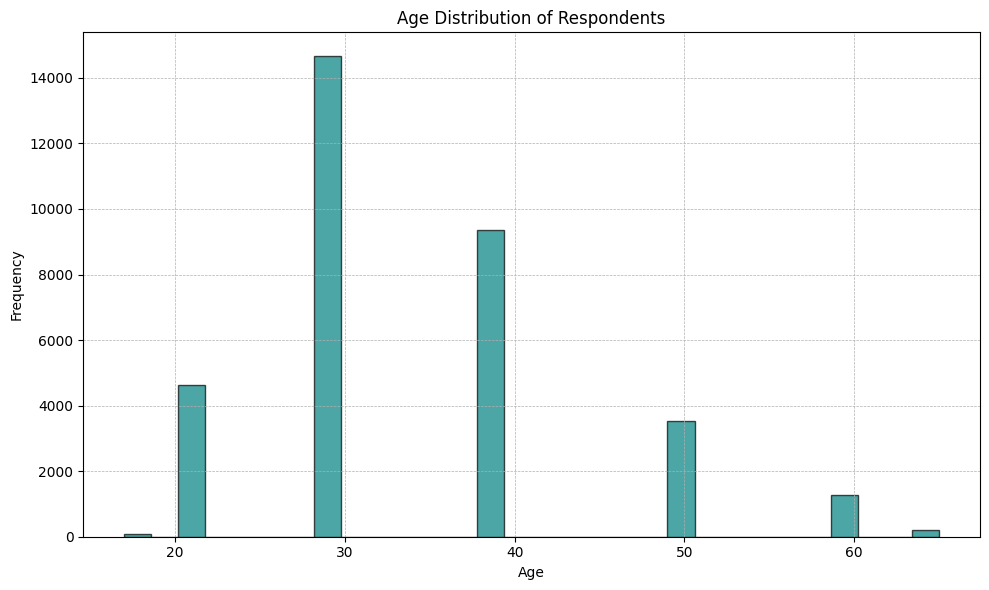

In [10]:


# SQL query to get Age and CompTotal data
query = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Map age groups to representative numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Plot histogram of Age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['AgeNumeric'], bins=30, color='teal', alpha=0.7, edgecolor='black')

# Styling
plt.title("Age Distribution of Respondents")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()



### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_554/3326955110.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='CompTotal', data=df, palette="Set2")


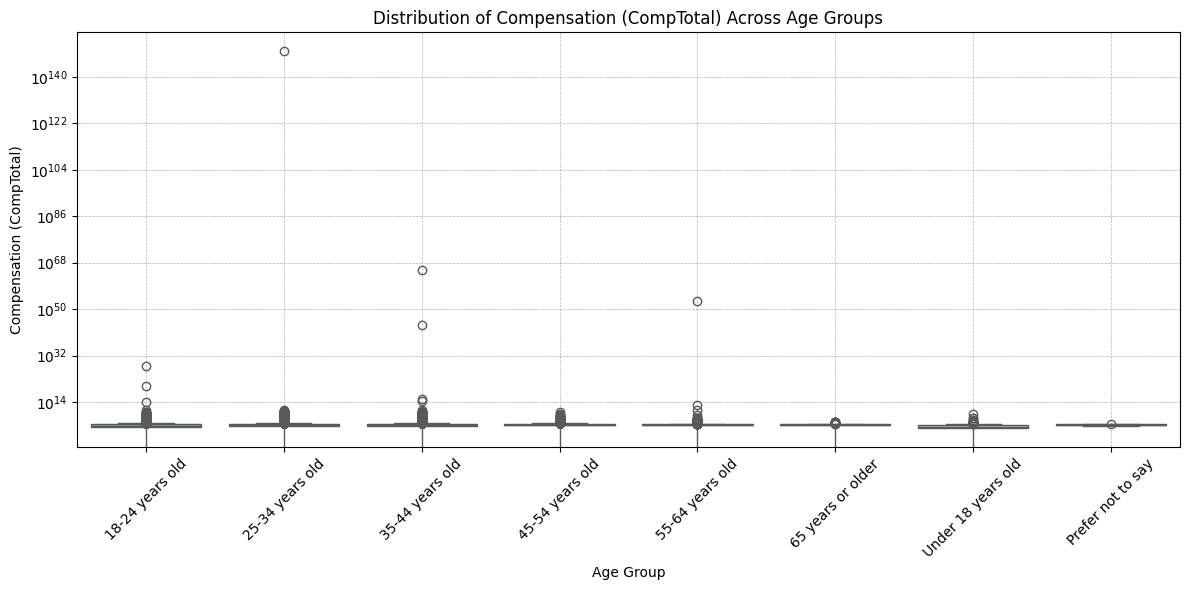

In [13]:
!pip install seaborn

import seaborn as sns

# SQL query to get Age and CompTotal data
query = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Map age groups to representative numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Plot the distribution of compensation (CompTotal) across different age groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='CompTotal', data=df, palette="Set2")

# Styling
plt.title("Distribution of Compensation (CompTotal) Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Compensation (CompTotal)")
plt.xticks(rotation=45)
plt.yscale('log')  # Use log scale to handle skewed compensation data
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_554/109300767.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSat', y='CompTotal', data=df, palette='Set2')


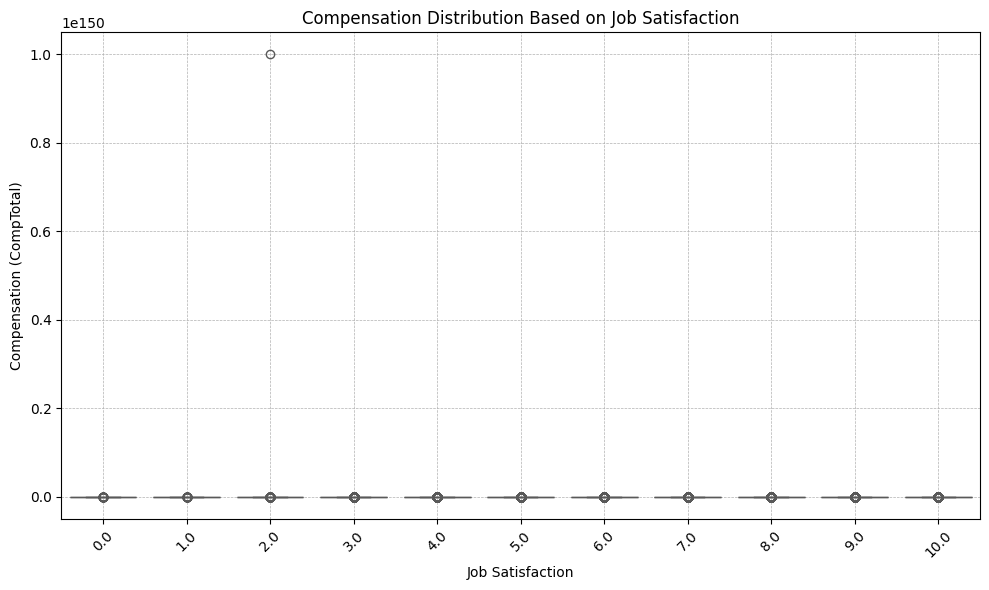

In [14]:
# SQL query to get compensation and job satisfaction data
query = "SELECT JobSat, CompTotal FROM main WHERE JobSat IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Clean and transform data
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Visualize using a box plot to analyze compensation by job satisfaction levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSat', y='CompTotal', data=df, palette='Set2')

# Styling the plot
plt.title("Compensation Distribution Based on Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Compensation (CompTotal)")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_554/1177513827.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DevType', y='CompTotal', data=df_top_roles, palette="Set2")


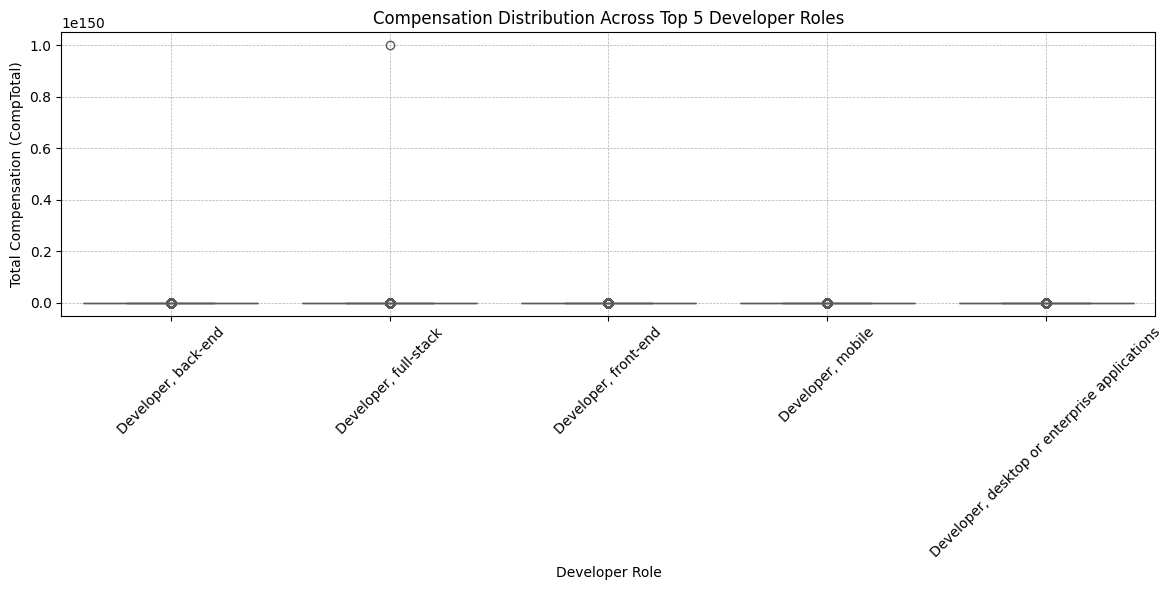

In [17]:
# Query to retrieve developer role and compensation data
query = """
SELECT DevType, CompTotal 
FROM main 
WHERE DevType IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Clean and preprocess the data
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Get top 5 developer roles by count
top_dev_roles = df['DevType'].value_counts().head(5).index

# Filter the dataset for top 5 roles
df_top_roles = df[df['DevType'].isin(top_dev_roles)]

# Plot boxplot for compensation distribution across top 5 developer roles
plt.figure(figsize=(12, 6))
sns.boxplot(x='DevType', y='CompTotal', data=df_top_roles, palette="Set2")

# Styling
plt.title("Compensation Distribution Across Top 5 Developer Roles")
plt.xlabel("Developer Role")
plt.ylabel("Total Compensation (CompTotal)")
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_554/249255609.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='CompTotal', data=df_top_countries, palette="Set2")


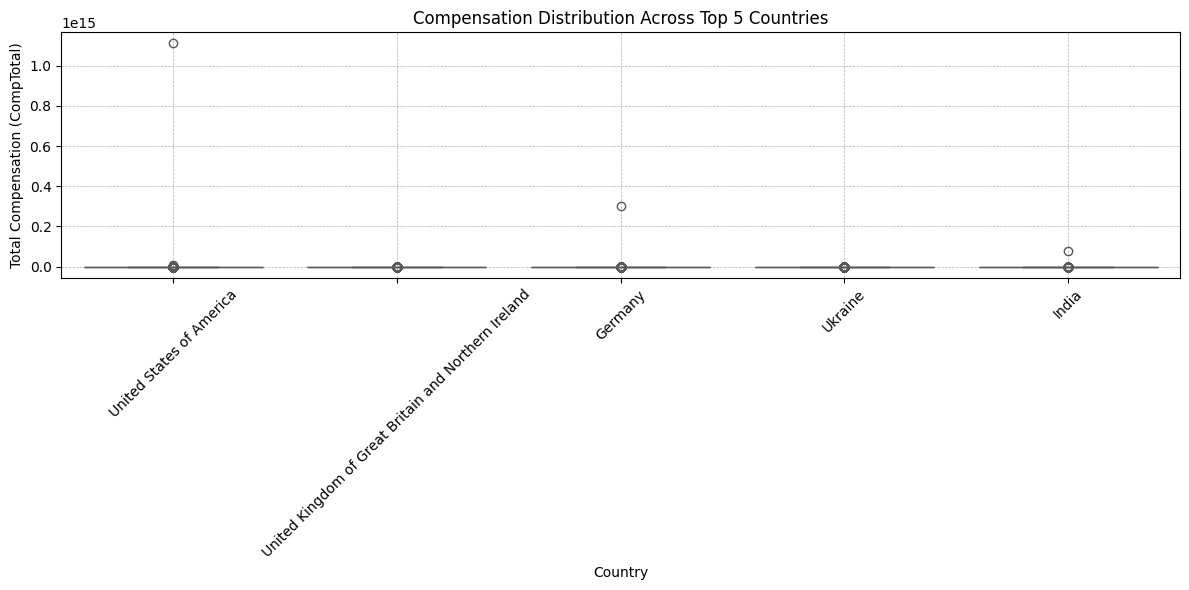

In [18]:
# Query to retrieve country and compensation data
query = """
SELECT Country, CompTotal 
FROM main 
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Clean and preprocess the data
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Get top 5 countries by count of respondents
top_countries = df['Country'].value_counts().head(5).index

# Filter the dataset for top 5 countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Plot boxplot for compensation distribution across top 5 countries
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='CompTotal', data=df_top_countries, palette="Set2")

# Styling
plt.title("Compensation Distribution Across Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Total Compensation (CompTotal)")
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_554/3279891738.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Employment', y='CompTotal', data=df, palette="Set2")
/tmp/ipykernel_554/3279891738.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


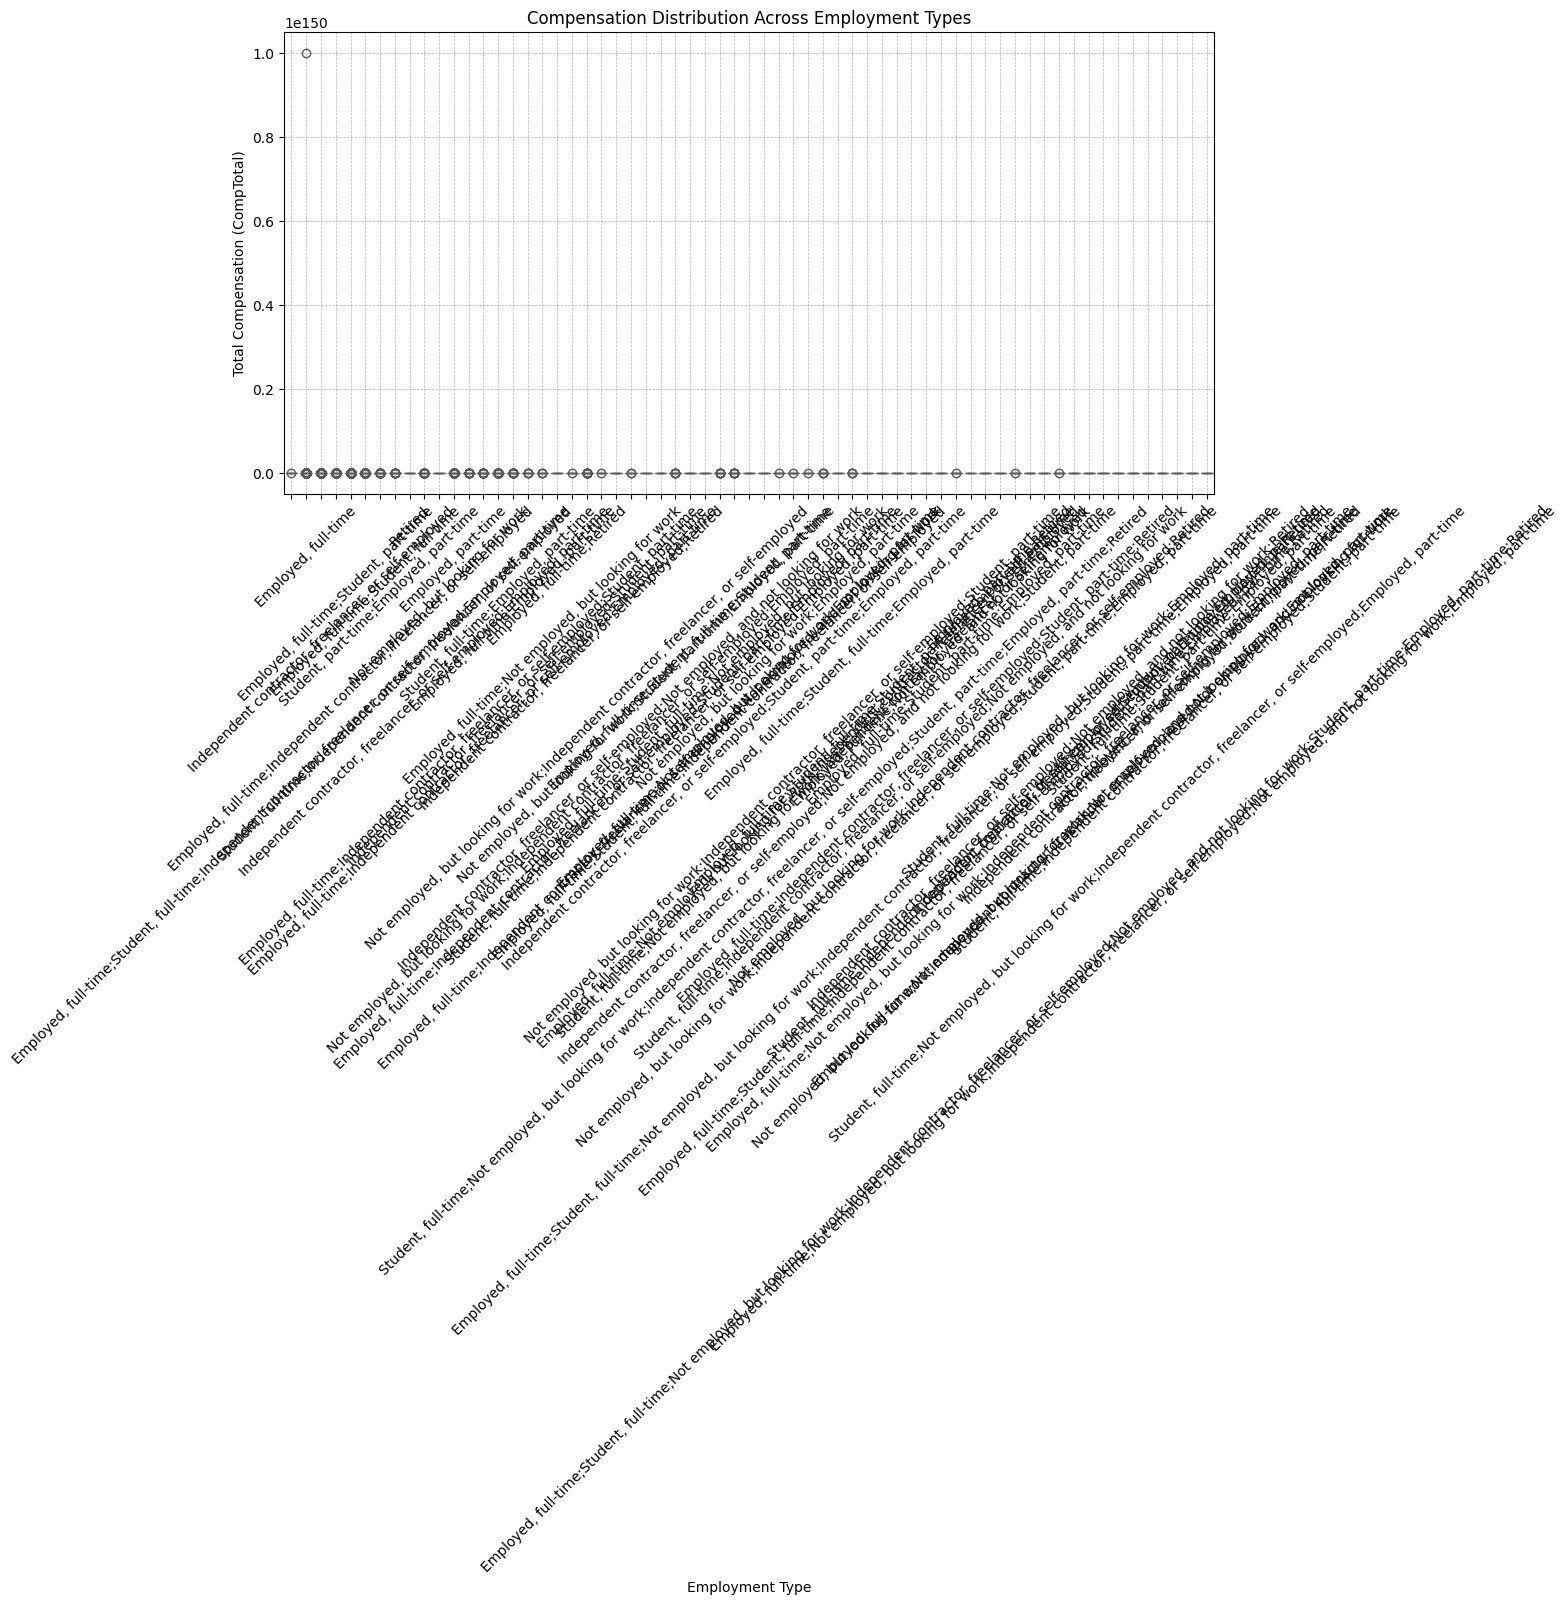

In [23]:

!pip install scikit-learn
# Query to retrieve employment type and compensation data
query = """
SELECT Employment, CompTotal 
FROM main 
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Clean and preprocess the data
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Step 1: Split the responses into lists
df['Employment_split'] = df['Employment'].str.split(';')

# Step 2: Use MultiLabelBinarizer to one-hot encode multi-label data
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
employment_dummies = pd.DataFrame(mlb.fit_transform(df['Employment_split']),
                                  columns=mlb.classes_,
                                  index=df.index)

# Step 3: Concatenate the new one-hot encoded columns with the original DataFrame
df = pd.concat([df, employment_dummies], axis=1)

# Optional: Drop the original 'Employment_split' column
df.drop(columns=['Employment_split'], inplace=True)

# Plot boxplot for compensation distribution across employment types
plt.figure(figsize=(12, 6))
sns.boxplot(x='Employment', y='CompTotal', data=df, palette="Set2")

# Styling
plt.title("Compensation Distribution Across Employment Types")
plt.xlabel("Employment Type")
plt.ylabel("Total Compensation (CompTotal)")
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()



**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_554/1465693353.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df, palette="Set2")


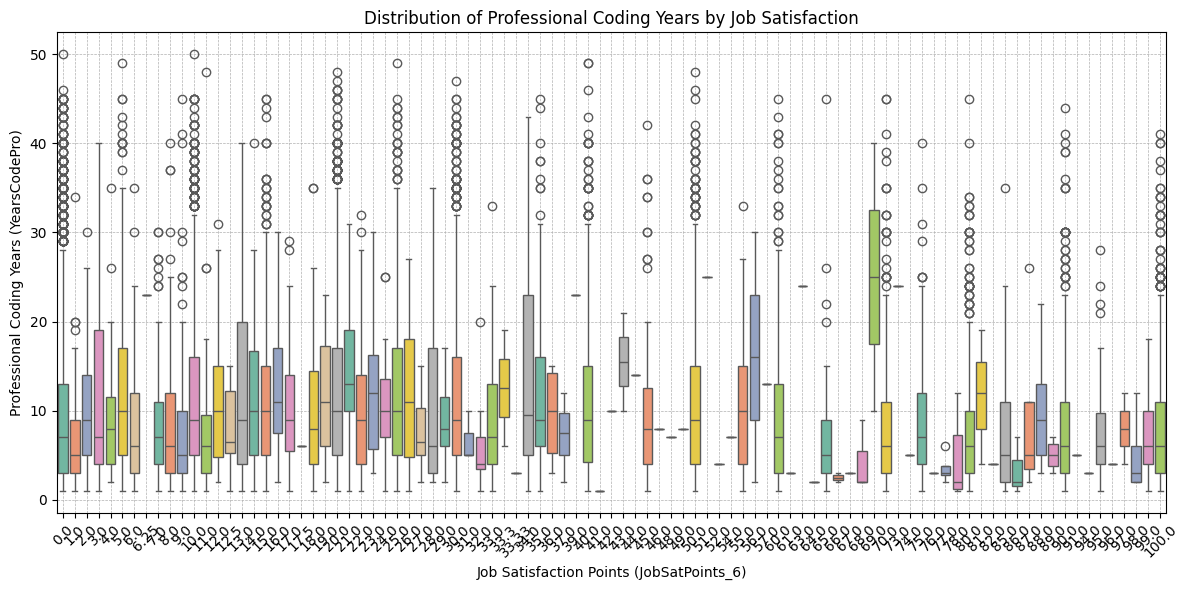

In [24]:
# Query to retrieve the relevant data
query = """
SELECT YearsCodePro, JobSatPoints_6
FROM main 
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Clean and preprocess the data
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Plot boxplot for YearsCodePro across JobSatPoints_6 (Job Satisfaction levels)
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df, palette="Set2")

# Styling
plt.title("Distribution of Professional Coding Years by Job Satisfaction")
plt.xlabel("Job Satisfaction Points (JobSatPoints_6)")
plt.ylabel("Professional Coding Years (YearsCodePro)")
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [25]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
